In [1]:
import anndata
import scanpy as sc
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.pyplot import rc_context

In [2]:
adata = sc.read('/lmh_data/data/sclab/syn22092838/snRNA_counts.mtx')
genes = pd.read_csv('/lmh_data/data/sclab/syn22092838/genes.csv', header=None)
scRNA_metadata = pd.read_csv('/lmh_data/data/sclab/syn22092838/snRNA_metadta.csv', index_col=0)

adata.obs_names = genes.values.reshape(-1)
adata.var = scRNA_metadata
adata = adata.T

adata = adata[adata.obs[adata.obs['celltype'].isin(['ASC', 'OPC', 'ODC'])].index,:]
adata

View of AnnData object with n_obs × n_vars = 44548 × 36114
    obs: 'Sample.ID', 'Batch', 'Sex', 'Age', 'Diagnosis', 'UMAP_1', 'UMAP_2', 'cluster', 'celltype'

In [3]:
_adata = adata[adata.obs[adata.obs['celltype'].isin(['ASC'])].index,:].copy()

/root/miniconda3/envs/sclab/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<AxesSubplot: xlabel='UMAP_1', ylabel='UMAP_2'>

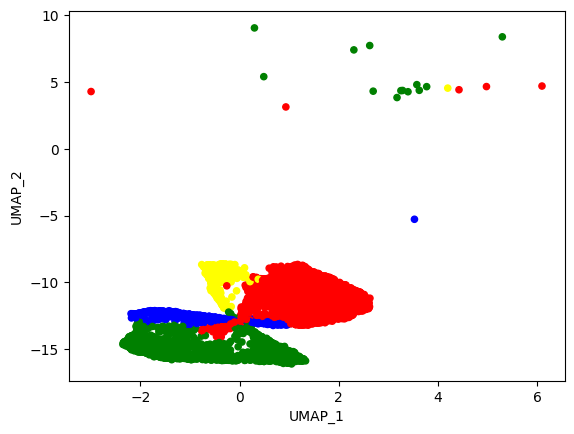

In [4]:
_colors = {'ASC1':'red', 'ASC2':'green', 'ASC3':'blue', 'ASC4':'yellow'}
_adata.obs.plot.scatter(x='UMAP_1', y='UMAP_2', c=_adata.obs['cluster'].map(_colors))

/root/miniconda3/envs/sclab/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<AxesSubplot: xlabel='UMAP_1', ylabel='UMAP_2'>

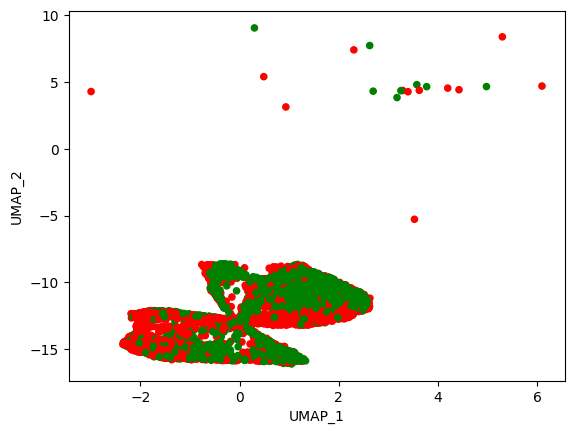

In [5]:
_colors = {'AD':'red', 'Control':'green'}
_adata.obs.plot.scatter(x='UMAP_1', y='UMAP_2', c=_adata.obs['Diagnosis'].map(_colors))

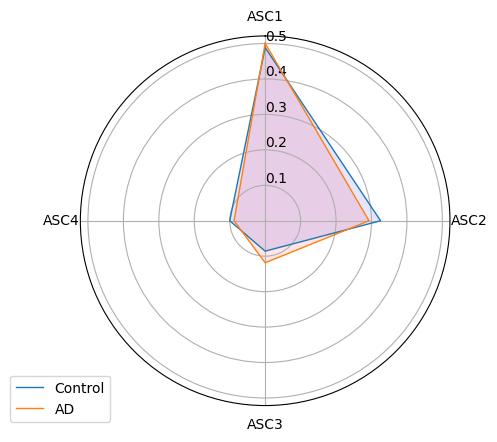

In [6]:
from math import pi


categories = ['ASC1', 'ASC2', 'ASC3', 'ASC4']
N = len(categories)

angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

ax = plt.subplot(111, polar=True)

ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)

plt.xticks(angles[:-1], categories)
ax.set_rlabel_position(0)

_control_df = _adata.obs[_adata.obs['Diagnosis']=='Control']
_control_cluster_proportions = _control_df['cluster'].value_counts() / _control_df['cluster'].value_counts().sum()
_control_cluster_proportions = [_control_cluster_proportions[c] for c in categories]
_AD_df = _adata.obs[_adata.obs['Diagnosis']=='AD']
_AD_cluster_proportions = _AD_df['cluster'].value_counts() / _AD_df['cluster'].value_counts().sum()
_AD_cluster_proportions = [_AD_cluster_proportions[c] for c in categories]

_control_cluster_proportions += _control_cluster_proportions[:1]
ax.plot(angles, _control_cluster_proportions, linewidth=1, linestyle='solid', label="Control")
ax.fill(angles, _control_cluster_proportions, 'b', alpha=0.1)

_AD_cluster_proportions += _AD_cluster_proportions[:1]
ax.plot(angles, _AD_cluster_proportions, linewidth=1, linestyle='solid', label="AD")
ax.fill(angles, _AD_cluster_proportions, 'r', alpha=0.1)

plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
# plt.savefig('Overlap of disease and normal.pdf', format='pdf', bbox_inches='tight')
plt.show()

/root/miniconda3/envs/sclab/lib/python3.8/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/root/miniconda3/envs/sclab/lib/python3.8/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/root/miniconda3/envs/sclab/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


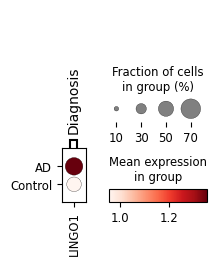

In [7]:
marker_genes_dict = {'Diagnosis': ['LINGO1']}
sc.pl.dotplot(adata, marker_genes_dict, groupby='Diagnosis')

/root/miniconda3/envs/sclab/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


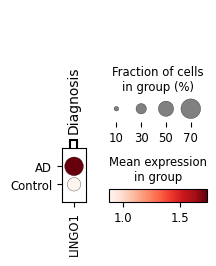

In [8]:
sc.pl.dotplot(
    adata[adata.obs[adata.obs.celltype=='ASC'].index,:], marker_genes_dict, groupby='Diagnosis',
#     save='ASC_DLC1_expression.pdf'
)

/root/miniconda3/envs/sclab/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


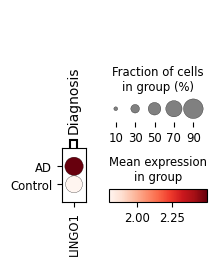

In [9]:
sc.pl.dotplot(adata[adata.obs[adata.obs.celltype=='OPC'].index,:], marker_genes_dict, groupby='Diagnosis')

/root/miniconda3/envs/sclab/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


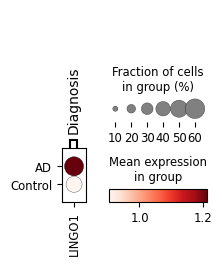

In [10]:
sc.pl.dotplot(adata[adata.obs[adata.obs.celltype=='ODC'].index,:], marker_genes_dict, groupby='Diagnosis')

/root/miniconda3/envs/sclab/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


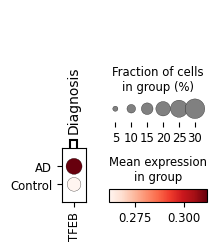

/root/miniconda3/envs/sclab/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


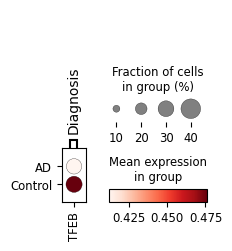

/root/miniconda3/envs/sclab/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


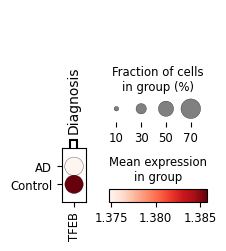

In [11]:
marker_genes_dict = {'Diagnosis': ['TFEB']}
sc.pl.dotplot(
    adata[adata.obs[adata.obs.celltype=='ASC'].index,:], marker_genes_dict, groupby='Diagnosis',
#     save='ASC_TFEB_expression.pdf'
)
sc.pl.dotplot(
    adata[adata.obs[adata.obs.celltype=='OPC'].index,:], marker_genes_dict, groupby='Diagnosis',
#     save='OPC_TFEB_expression.pdf'
)
sc.pl.dotplot(
    adata[adata.obs[adata.obs.celltype=='ODC'].index,:], marker_genes_dict, groupby='Diagnosis',
#     save='ODC_TFEB_expression.pdf'
)

/root/miniconda3/envs/sclab/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


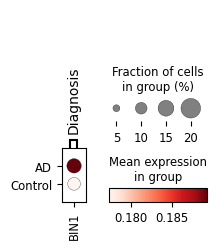

/root/miniconda3/envs/sclab/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


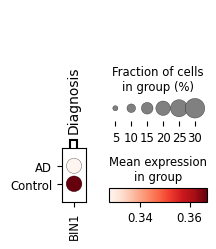

/root/miniconda3/envs/sclab/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


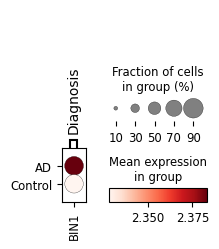

In [12]:
marker_genes_dict = {'Diagnosis': ['BIN1']}
sc.pl.dotplot(
    adata[adata.obs[adata.obs.celltype=='ASC'].index,:], marker_genes_dict, groupby='Diagnosis',
#     save='ASC_BIN1_expression.pdf'
)
sc.pl.dotplot(adata[adata.obs[adata.obs.celltype=='OPC'].index,:], marker_genes_dict, groupby='Diagnosis')
sc.pl.dotplot(adata[adata.obs[adata.obs.celltype=='ODC'].index,:], marker_genes_dict, groupby='Diagnosis')